- Checking the Name of GPU 

In [ ]:
!nvidia-smi

Sun Jan 29 10:22:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- Import packages which are required

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


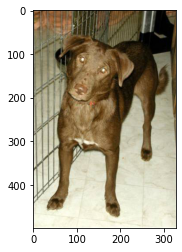

In [ ]:
dog_1 = plt.imread('/content/drive/MyDrive/dataset/training_set/dogs/dog.1.jpg')
plt.imshow(dog_1)

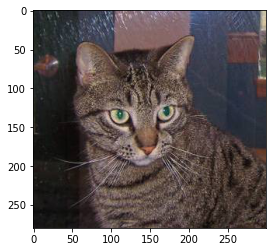

In [ ]:
cat_1 = plt.imread('/content/drive/MyDrive/dataset/training_set/cats/cat.1.jpg')
plt.imshow(cat_1)

- **Training The CNN **

In [ ]:
data_set_path = '/content/drive/MyDrive/dataset' # root folder 

- Train data path and test data path 

In [ ]:
train_data_path = '/content/drive/MyDrive/dataset/training_set'

In [ ]:
test_data_path = '/content/drive/MyDrive/dataset/test_set'

- fixed size 

In [ ]:
img_width , img_height = 150,150

- glog is used to find the number of folder inside a folder

In [ ]:
import glob

In [ ]:
from glob import glob 
glob('/content/drive/MyDrive/dataset/training_set/*')  # * is used to find number of folders inside a folder 

['/content/drive/MyDrive/dataset/training_set/dogs',
 '/content/drive/MyDrive/dataset/training_set/cats']

In [ ]:
from glob import glob 
glob('/content/drive/MyDrive/dataset/test_set/*')  # * is used to find number of folders inside a folder 

['/content/drive/MyDrive/dataset/test_set/cats',
 '/content/drive/MyDrive/dataset/test_set/dogs']

- Data Augumentation Means 1 image converts into multiple image 
- Transformation means changing the images as linear format 

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
preprocess_train_data = ImageDataGenerator(rescale = 1./255,
                                           shear_range = 0.2,
                                           horizontal_flip = True,
                                           zoom_range = 0.2)

In [ ]:
preprocess_test_data = ImageDataGenerator(rescale = 1./255)

In [ ]:
labels = ['cats','dogs']

In [ ]:
train_data = preprocess_train_data.flow_from_directory(train_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'binary' , batch_size = 32)

Found 8005 images belonging to 2 classes.


In [ ]:
test_data =  preprocess_test_data.flow_from_directory(test_data_path , target_size = (img_height,img_width) , classes = labels , class_mode = 'binary' , batch_size = 32)

Found 2023 images belonging to 2 classes.


- Develop Custom CNN Architecture 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax


- Architecture 

In [ ]:

model = Sequential()
# first kernel and max poo layers
model.add(Conv2D(128 , kernel_size = (3,3) , input_shape = (img_height,img_width,3) , padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# second kernel and max poo layers
model.add(Conv2D(64 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# third kernel and max poo layers
model.add(Conv2D(32 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# forth kernel and max poo layers
model.add(Conv2D(6 , kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # one dimensional array
# above 1d data give to ANN 
model.add(Dense(32,activation='relu')) # hiddel layer 1
model.add(Dense(16,activation = 'relu')) # hiddel layer 2
# output layer 
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

Need to define optimizer , loss function and metric 

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['Accuracy'])

- Training Begins 

In [ ]:
model.fit(train_data , epochs = 50)

Epoch 1/50
251/251 [==============================] - 68s 268ms/step - loss: 0.2805 - Accuracy: 0.8782
Epoch 2/50
251/251 [==============================] - 67s 268ms/step - loss: 0.2874 - Accuracy: 0.8713
Epoch 3/50
251/251 [==============================] - 67s 268ms/step - loss: 0.2782 - Accuracy: 0.8786
Epoch 4/50
251/251 [==============================] - 67s 266ms/step - loss: 0.2783 - Accuracy: 0.8819
Epoch 5/50
251/251 [==============================] - 67s 268ms/step - loss: 0.2667 - Accuracy: 0.8887
Epoch 6/50
251/251 [==============================] - 67s 266ms/step - loss: 0.2604 - Accuracy: 0.8864
Epoch 7/50
251/251 [==============================] - 67s 268ms/step - loss: 0.2624 - Accuracy: 0.8861
Epoch 8/50
251/251 [==============================] - 67s 267ms/step - loss: 0.2653 - Accuracy: 0.8864
Epoch 9/50
251/251 [==============================] - 67s 266ms/step - loss: 0.2668 - Accuracy: 0.8848
Epoch 10/50
251/251 [==============================] - 68s 269ms/step - l

Checking the key values

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [ ]:
training_loss = model.history.history['loss']

In [ ]:
training_loss

[0.28050053119659424,
 0.2873532772064209,
 0.27820393443107605,
 0.2782581150531769,
 0.2666633725166321,
 0.2604098320007324,
 0.26242145895957947,
 0.26526471972465515,
 0.26681992411613464,
 0.2627769708633423,
 0.24343353509902954,
 0.24342794716358185,
 0.24265897274017334,
 0.2413104772567749,
 0.23637166619300842,
 0.23130619525909424,
 0.23078098893165588,
 0.233566552400589,
 0.23358221352100372,
 0.22036981582641602,
 0.2343025505542755,
 0.22188524901866913,
 0.21021178364753723,
 0.21387024223804474,
 0.2136135995388031,
 0.2149440497159958,
 0.2166152447462082,
 0.20154698193073273,
 0.19594377279281616,
 0.19986584782600403,
 0.19839224219322205,
 0.18937407433986664,
 0.19816702604293823,
 0.19101665914058685,
 0.18693137168884277,
 0.19187907874584198,
 0.18757982552051544,
 0.18260447680950165,
 0.17269757390022278,
 0.1737641543149948,
 0.19040776789188385,
 0.18212372064590454,
 0.18003512918949127,
 0.1695646494626999,
 0.17400597035884857,
 0.16845761239528656,
 0

In [ ]:
training_acc = model.history.history['Accuracy']
training_acc

[0.8782011270523071,
 0.8713304400444031,
 0.87857586145401,
 0.8819487690925598,
 0.8886945843696594,
 0.8864459991455078,
 0.8860712051391602,
 0.8864459991455078,
 0.8848220109939575,
 0.8876951932907104,
 0.8959400653839111,
 0.8989381790161133,
 0.8979387879371643,
 0.8949406743049622,
 0.8943160772323608,
 0.9015614986419678,
 0.9025608897209167,
 0.899812638759613,
 0.8995627760887146,
 0.9039350152015686,
 0.8991879820823669,
 0.9058088660240173,
 0.9099313020706177,
 0.9066833257675171,
 0.9088069796562195,
 0.9100562334060669,
 0.9064334630966187,
 0.917426586151123,
 0.9164272546768188,
 0.9118050932884216,
 0.9149281978607178,
 0.9186758399009705,
 0.9171767830848694,
 0.9196752309799194,
 0.9225484132766724,
 0.9201748967170715,
 0.9220487475395203,
 0.9252966642379761,
 0.9270455837249756,
 0.9261711239814758,
 0.9236726760864258,
 0.9232979416847229,
 0.9266708493232727,
 0.9292941689491272,
 0.930168628692627,
 0.9279200434684753,
 0.928294837474823,
 0.9304184913635254

EDA for Model validation 

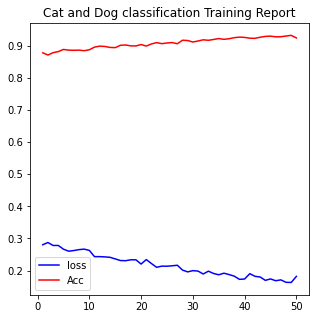

In [ ]:
plt.figure(figsize = (5,5))
plt.title('Cat and Dog classification Training Report')
plt.plot(np.arange(1,51) , training_loss , color = 'b',label = 'loss')
plt.plot(np.arange(1,51) , training_acc , color = 'r',label = 'Acc')
plt.legend(loc = 0)
plt.show()

- Since the training accuracy is 92 % with 8005 images we can say out own CNN model is really trained well.

- If our Trained model is working well with test data then only we can say our model is working fine or else we can say there is an overfitting problem 

Now its time to checking the validation report [performance for test data]

In [ ]:
# 2023 images 
# 1000 - cat 
# 1000 - dog 

In [ ]:
# Actual dependent values will be consider as 
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_data.classes[:1010]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
test_data.classes[1010:]

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_test_pred = model.predict(test_data)

64/64 [==============================] - 8s 120ms/step


In [ ]:
y_test_pred

array([[0.17781356],
       [0.00672385],
       [0.7836478 ],
       ...,
       [0.9739493 ],
       [0.9991904 ],
       [0.3903329 ]], dtype=float32)

In [ ]:
# converting probability values into 0 and 1 class for checking performance report 
c = []
for i in y_test_pred:
  for j in i:
    if j > 0.5:
      c.append(1)
    else:
      c.append(0)
    

In [ ]:
c[:10]

[0, 0, 1, 0, 0, 0, 1, 1, 1, 1]

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [ ]:
# Accuracy 

accuracy_score(test_data.classes , c)

0.5160652496292635

In [ ]:
confusion_matrix(test_data.classes , c)

array([[530, 481],
       [498, 514]])

In [ ]:
# 2023 
530 + 481 + 498 + 514

2023

In [ ]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1011
           1       0.52      0.51      0.51      1012

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.52      2023
weighted avg       0.52      0.52      0.52      2023



To overcome the overfitting problem increase keral layers and give few parameters which works fine https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
# Now downloading the 2 cat and 2 dog images from internt and checking with developed model 

[[[218 209 176]
  [217 208 175]
  [216 207 174]
  ...
  [230 220 208]
  [230 220 208]
  [230 220 208]]

 [[218 209 176]
  [217 208 175]
  [216 207 174]
  ...
  [231 221 209]
  [231 221 209]
  [231 221 209]]

 [[218 209 176]
  [216 207 174]
  [216 207 174]
  ...
  [232 222 210]
  [232 222 210]
  [232 222 210]]

 ...

 [[182 152 118]
  [182 152 118]
  [184 154 120]
  ...
  [226 214 198]
  [226 214 198]
  [225 213 197]]

 [[181 151 117]
  [182 152 118]
  [183 153 119]
  ...
  [227 215 199]
  [226 214 198]
  [225 213 197]]

 [[181 151 117]
  [182 152 118]
  [183 153 119]
  ...
  [226 214 198]
  [226 214 198]
  [225 213 197]]]
(1199, 1200, 3)


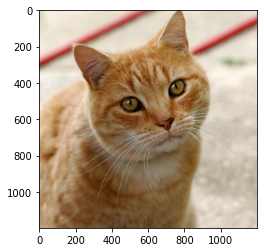

In [ ]:
import matplotlib.pyplot as plt 
img = plt.imread('/content/Cat03.jpg')
print(img)
print(img.shape)
plt.imshow(img)

In [ ]:
import cv2

In [ ]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (150,150))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  if result[0][0] > 0.5:
    print('The Prediction is = Dog')
  else:
    print('The Prediction is = Cat') 
  img = plt.imread(path)
  plt.imshow(img)








(1199, 1200, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 15ms/step
[[0.0003831]]
The Prediction is = Cat


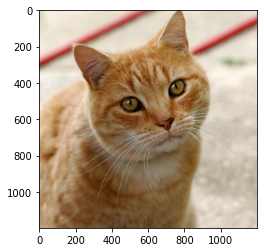

In [ ]:
prediction('/content/Cat03.jpg')

(198, 255, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 17ms/step
[[0.99001515]]
The Prediction is = Dog


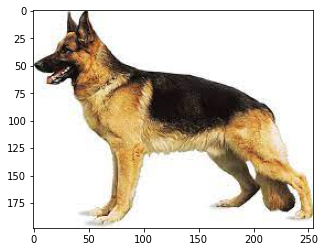

In [ ]:
prediction('/content/download (4).jpg')

(168, 300, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 17ms/step
[[0.9971746]]
The Prediction is = Dog


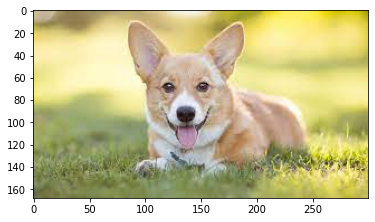

In [ ]:
prediction('/content/download (5).jpg')

(183, 275, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 15ms/step
[[0.21160385]]
The Prediction is = Cat


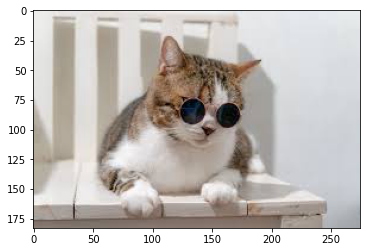

In [ ]:
prediction('/content/images.jpg')